# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
df = pd.concat([train_df, test_df])

In [4]:
df.shape

(783667, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

In [8]:
# Total number of unique values in Each of the columns

columns_values = dict()
for i in df.columns:
    columns_values[i] = df[i].nunique()

columns_values

{'user_id': 5891,
 'product_id': 3677,
 'gender': 2,
 'age': 7,
 'occupation': 21,
 'city_category': 3,
 'stay_in_current_city_years': 5,
 'marital_status': 2,
 'product_category_1': 20,
 'product_category_2': 17,
 'product_category_3': 15,
 'purchase': 18105}

In [9]:
# How many times male and female purchases in the dataset
len(df[df['gender'] == 'M']), len(df[df['gender'] == 'F'])

(590031, 193636)

<Axes: title={'center': 'Gender Ratio'}>

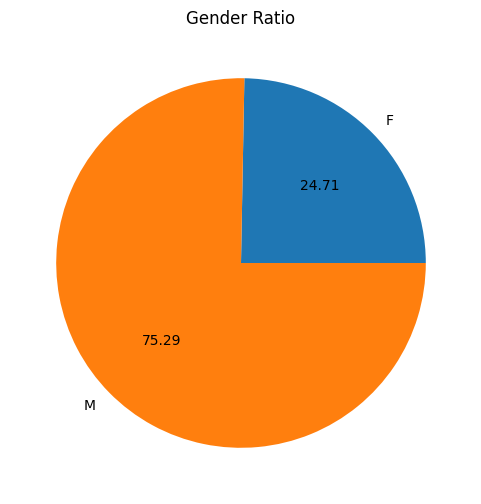

In [10]:
df.groupby('gender').size().plot(kind='pie', autopct = '%1.2f', title = 'Gender Ratio', figsize=(6,6))

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0-17'),
  Text(1, 0, '18-25'),
  Text(2, 0, '26-35'),
  Text(3, 0, '36-45'),
  Text(4, 0, '46-50'),
  Text(5, 0, '51-55'),
  Text(6, 0, '55+')])

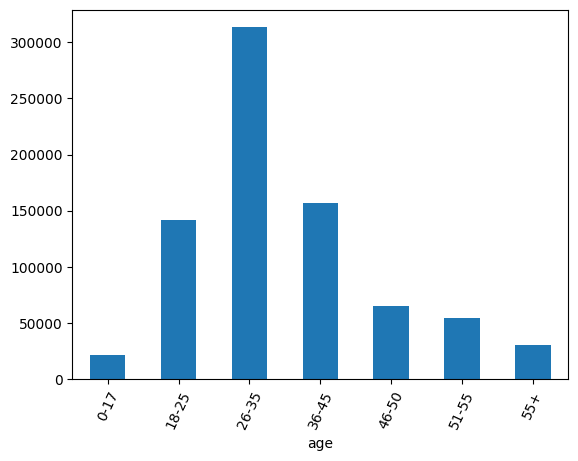

In [11]:
df.groupby('age').size().plot.bar()
plt.xticks(rotation = 65)

In [12]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: xlabel='age', ylabel='count'>

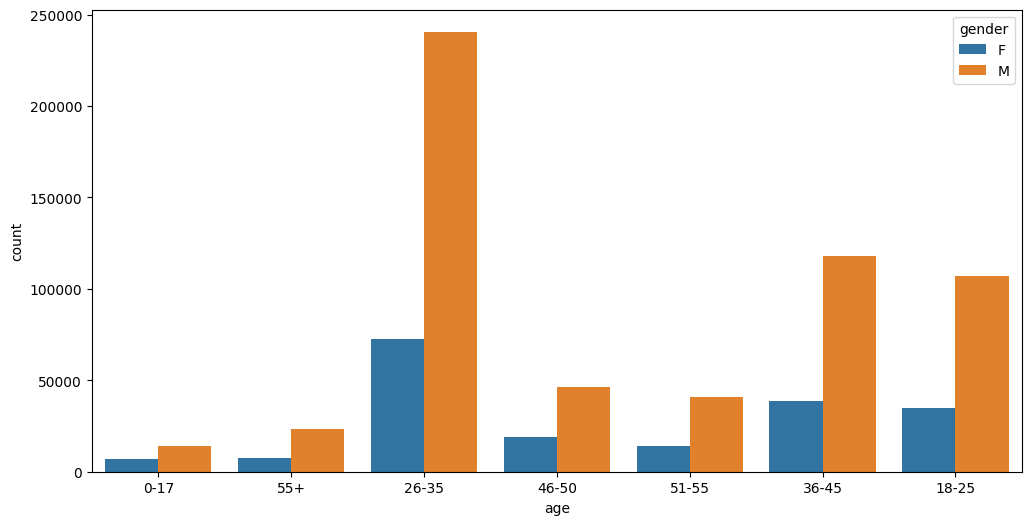

In [13]:
plt.figure(figsize = (12, 6))
# plt.style.use('grayscale')
sns.countplot(x = 'age', hue = 'gender' , data = df) 

<Axes: xlabel='gender', ylabel='count'>

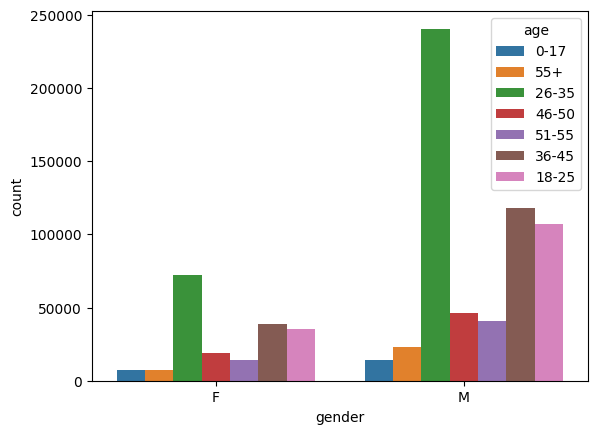

In [14]:
sns.countplot( x= 'gender' , hue= 'age', data = df) 

<Axes: xlabel='occupation', ylabel='count'>

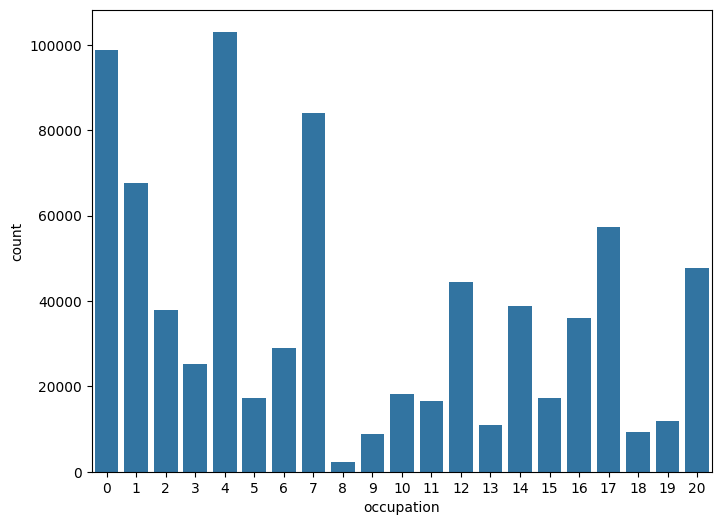

In [15]:
plt.figure(figsize = (8, 6))

# plt.style.use('classic')

sns.countplot(x = df.occupation)

# `EDA`

In [16]:
df.drop(['user_id', 'product_id'], axis = 1, inplace = True)

In [17]:
df

,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...
233594,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


## Mapping the columns

In [18]:
# Mapping the gender columns
df.gender.unique()

array(['F', 'M'], dtype=object)

In [19]:
# F : 0 and M : 1
# df['gender'] = df['gender'].map({'F':0, 'M':1})

label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['age'] = label_encoder.fit_transform(df['age'])
df['city_category'] = label_encoder.fit_transform(df['city_category'])

In [20]:
df

,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,0,0,10,0,2,0,3,NaN,NaN,8370.0
1,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,0,0,10,0,2,0,12,NaN,NaN,1422.0
3,0,0,10,0,2,0,12,14.0,NaN,1057.0
4,1,6,16,2,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...
233594,0,2,15,1,4+,1,8,NaN,NaN,NaN
233595,0,2,15,1,4+,1,5,8.0,NaN,NaN
233596,0,2,15,1,4+,1,1,5.0,12.0,NaN
233597,0,4,1,2,4+,0,10,16.0,NaN,NaN


In [21]:
df.isnull().sum()

gender                             0
age                                0
occupation                         0
city_category                      0
stay_in_current_city_years         0
marital_status                     0
product_category_1                 0
product_category_2            245982
product_category_3            545809
purchase                      233599
dtype: int64

In [22]:
# Handling the missing values in the dataset
imputer = SimpleImputer(strategy = 'most_frequent')

product_cat2 = df['product_category_2'].values.reshape(-1, 1) # Reshaping the data to 2D array
product_cat3 = df['product_category_3'].values.reshape(-1, 1)
purchase = df['purchase'].values.reshape(-1, 1)

df['product_category_2'] = imputer.fit_transform(product_cat2)
df['product_category_3'] = imputer.fit_transform(product_cat3)
df['purchase'] = imputer.fit_transform(purchase)


In [23]:
df.isnull().sum()

gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category_1            0
product_category_2            0
product_category_3            0
purchase                      0
dtype: int64

In [24]:
df['stay_in_current_city_years'] = df['stay_in_current_city_years'].replace('4+', '4')

In [25]:
df['stay_in_current_city_years'] = df['stay_in_current_city_years'].astype(int)
df

,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,0,0,10,0,2,0,3,8.0,16.0,8370.0
1,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,0,0,10,0,2,0,12,8.0,16.0,1422.0
3,0,0,10,0,2,0,12,14.0,16.0,1057.0
4,1,6,16,2,4,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
233594,0,2,15,1,4,1,8,8.0,16.0,7011.0
233595,0,2,15,1,4,1,5,8.0,16.0,7011.0
233596,0,2,15,1,4,1,1,5.0,12.0,7011.0
233597,0,4,1,2,4,0,10,16.0,16.0,7011.0


In [37]:
df['product_category_2'] = df['product_category_2'].astype(int)
df['product_category_3'] = df['product_category_3'].astype(int)
df['purchase'] = df['purchase'].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   gender                      783667 non-null  int32  
 1   age                         783667 non-null  int32  
 2   occupation                  783667 non-null  int64  
 3   city_category               783667 non-null  int32  
 4   stay_in_current_city_years  783667 non-null  int32  
 5   marital_status              783667 non-null  int64  
 6   product_category_1          783667 non-null  int64  
 7   product_category_2          783667 non-null  float64
 8   product_category_3          783667 non-null  float64
 9   purchase                    783667 non-null  float64
dtypes: float64(3), int32(4), int64(3)
memory usage: 53.8 MB


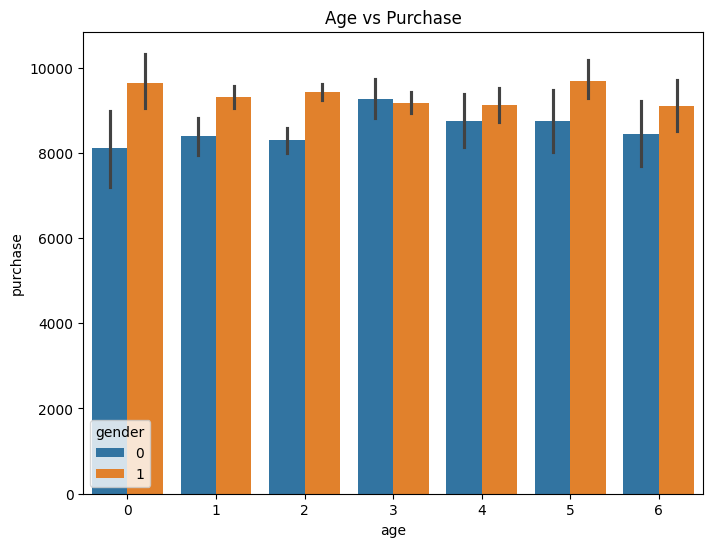

In [27]:
plt.figure(figsize = (8, 6))
sns.barplot(x= 'age', y = 'purchase', hue = 'gender', data = df.iloc[:10000])
plt.title('Age vs Purchase')
plt.show()

<Axes: xlabel='occupation', ylabel='purchase'>

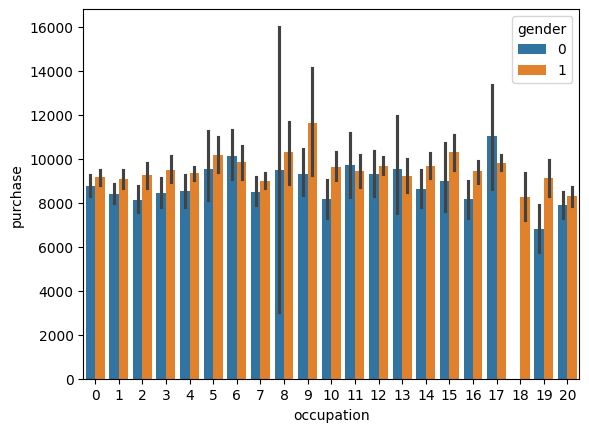

In [38]:
sns.barplot(x= 'occupation', y = 'purchase', hue = 'gender', data = df.iloc[:10000])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

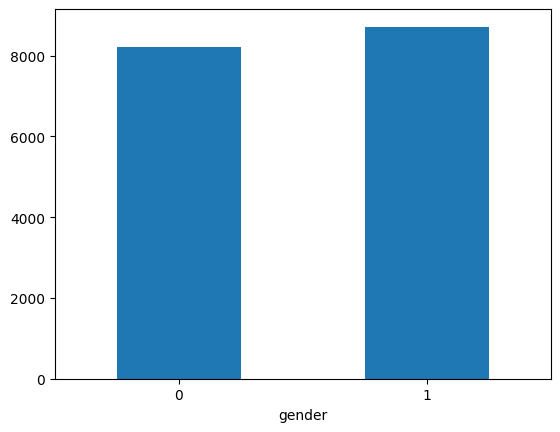

In [39]:
df.groupby('gender').mean()['purchase'].plot.bar()
plt.xticks(rotation = 0)

<Axes: xlabel='product_category_1', ylabel='purchase'>

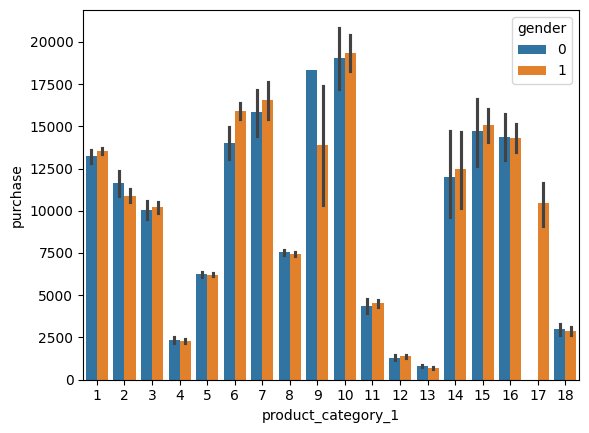

In [40]:
sns.barplot(x= 'product_category_1', y = 'purchase', hue = 'gender', data = df.iloc[:10000])

<Axes: xlabel='product_category_2', ylabel='purchase'>

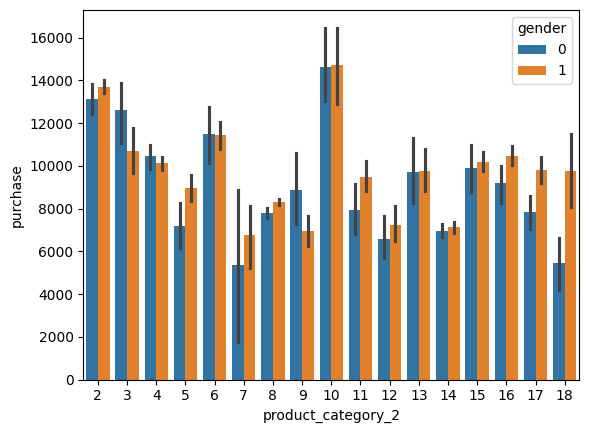

In [41]:
sns.barplot(x= 'product_category_2', y = 'purchase', hue = 'gender', data = df.iloc[:10000])

<Axes: xlabel='product_category_3', ylabel='purchase'>

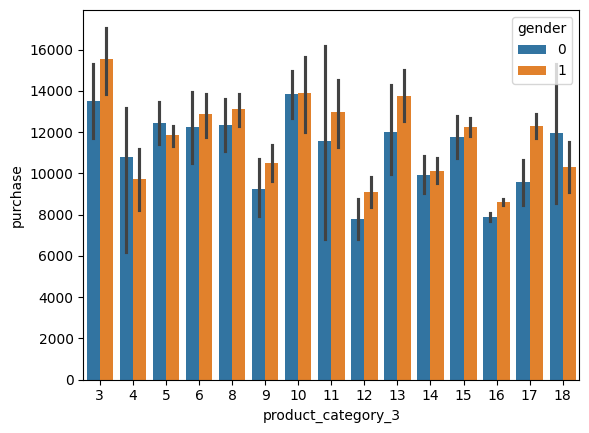

In [42]:
sns.barplot(x= 'product_category_3', y = 'purchase', hue = 'gender', data = df.iloc[:10000])


## Feature Scaling

In [57]:
df_test = df[df['purchase'].isnull()]
df_train = df[df['purchase'].notnull()]
X = df_train.drop('purchase', axis = 1)

In [62]:
y = df_train['purchase']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


# This line transforms (scales) the testing data (X_test) using the scaling parameters computed from the training data. The transform() method is used
# instead of fit_transform() because we want to apply the same scaling parameters computed from the training data to the testing data without re-computing
# them. This ensures that the scaling is consistent between the training and testing datasets.
X_test = scaler.transform(X_test)

Linear Regression

In [72]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [95]:
linear_y_pred = linear.predict(X_test)

In [97]:
linear_r2 = r2_score(y_test, linear_y_pred)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_y_pred))
linear_mae = mean_absolute_error(y_test, linear_y_pred)
linear_r2, linear_rmse, linear_mae

(0.08799666459636524, 4131.941346815591, 3049.314305528314)

In [77]:
linear.score(X_test, y_test)

0.08799666459636524

In [78]:
decision = DecisionTreeRegressor()
decision.fit(X_train, y_train)

DecisionTreeRegressor()

In [98]:
decision_y_pred = decision.predict(X_test)

In [80]:
decision.score(X_test, y_test)

0.27615155834302696

In [99]:
decision_r2 = r2_score(y_test, decision_y_pred)
decision_rmse = np.sqrt(mean_squared_error(y_test, decision_y_pred))
decision_mae = mean_absolute_error(y_test, decision_y_pred)
decision_r2, decision_rmse, decision_mae

(0.27615155834302696, 3681.118147684626, 2591.3808973884597)

In [70]:
gbr = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, learning_rate = 0.1)

In [71]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [100]:
gbr_y_pred = gbr.predict(X_test)

In [101]:
gbr.score(X_test, y_test)

0.42863263324738754

In [103]:
gbr_r2 = r2_score(y_test, gbr_y_pred)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_y_pred))
gbr_mae = mean_absolute_error(y_test, gbr_y_pred)
gbr_r2, gbr_rmse, gbr_mae

(0.42863263324738754, 3270.496215318713, 2461.264756538777)

In [104]:
print('Linear Regression: ', linear_r2, linear_rmse, linear_mae)
print('Decision Tree: ', decision_r2, decision_rmse, decision_mae)
print('Gradient Boosting: ', gbr_r2, gbr_rmse, gbr_mae)

Linear Regression:  0.08799666459636524 4131.941346815591 3049.314305528314
Decision Tree:  0.27615155834302696 3681.118147684626 2591.3808973884597
Gradient Boosting:  0.42863263324738754 3270.496215318713 2461.264756538777
